In [46]:
import pandas as pd
import os

In [47]:
df = pd.read_csv('scores/volume_score.csv', index_col=0)
df

,old,prophet,kpi,start_train,end_train
BRO-Co,25.000000,21.704785,volume,2018-10-01,2020-10-01
BRO_ah,45.785714,41.477053,volume,2018-11-01,2020-11-01
PSG_ah,164.000000,119.111885,volume,2018-11-01,2020-11-01
CS-Nat,26.285714,15.420914,volume,2018-11-01,2020-11-01
CS-Ala,10.000000,13.597113,volume,2018-11-01,2020-11-01
RIS_ah,210.500000,195.121807,volume,2017-01-20,2020-06-01
CS-Mar,43.714286,37.763526,volume,2018-11-01,2020-11-01
WISE-C,417.361111,549.615600,volume,2018-10-01,2020-10-01
RCS-PH,34.388889,35.927623,volume,2018-10-01,2020-10-01
CS-Joh,35.571429,28.200897,volume,2018-11-01,2020-11-01


In [48]:
df['diff (hours)'] = (df['old'] - df['prophet'])
diff = df[df['diff (hours)']>0]['diff (hours)']
diff

BRO-Co     3.295215
BRO_ah     4.308661
PSG_ah    44.888115
CS-Nat    10.864800
RIS_ah    15.378193
CS-Mar     5.950759
CS-Joh     7.370532
Name: diff (hours), dtype: float64

In [49]:
hours_saved = diff.sum()

print('Daily volume Saved:',round(hours_saved,1))
print('Annual Savings:',"${:,.2f}".format(hours_saved * 262 * 25))

Daily volume Saved: 92.1
Annual Savings: $602,968.61


# approximately 99 calls in savings
accross 262 business days at approximately `$25 per call = $647,937.05` in labor allocation cost savings.

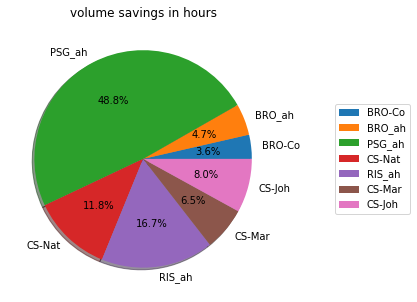

In [50]:
import matplotlib.pyplot as plt

df['diff (hours)'][df['diff (hours)']>0].plot.pie(autopct='%0.1f%%', figsize=(5, 5),
                                          shadow=True)
plt.title('volume savings in hours')
plt.ylabel('')
plt.legend(loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()